# **Import Library**

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import os

# **Part 1 - Data Proprocessing**

## **Getting Dataset**

In [ ]:
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/Arsitektur_CNN/dataset/data-train"
directories = os.listdir(base_dir)

filenames = []
labels = []

for directory in directories:
    directory_path = os.path.join(base_dir, directory)
    print("Processing directory:", directory_path)
    files = os.listdir(directory_path)
    for file in files:
        file_path = os.path.join(directory_path, file)
        filenames.append(file_path)
        labels.append(directory)
        print("File:", file_path)

# print("Filenames:", filenames)
# print("Labels:", labels)


Streaming output truncated to the last 5000 lines.
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_651.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_655.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_654.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_653.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_656.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_659.jpg
File: /content/drive/MyDrive/Arsitektur_CNN/dataset/data-train/tidak mengantuk & menguap/16-FemaleGlasses-Yawning.avi_frame_658.jpg
File: /content/drive/MyDr

In [ ]:
len(filenames)

11022

In [ ]:
import pandas as pd

data = {"filename": filenames,
        "label" : labels}
df=pd.DataFrame(data = data)

In [ ]:
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

                                                filename  \
615    /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
6601   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
1731   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
182    /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
7160   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
...                                                  ...   
10563  /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
10124  /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
8875   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
9438   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   
1345   /content/drive/MyDrive/Arsitektur_CNN/dataset/...   

                           label  
615    mengantuk & tidak menguap  
6601   tidak mengantuk & menguap  
1731   mengantuk & tidak menguap  
182    mengantuk & tidak menguap  
7160   tidak mengantuk & menguap  
...                          ...  
10563        mengantuk & menguap  

## **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

train_data = df_shuffled

Y = train_data[['label']]
kf = KFold(n_splits= 5)

# menggunakan StratifiedKFold pake ini
# skf = StratifiedKFold(n_splits=3, random_state=7, shuffle=True)


## **Preprocesing Traning Dataset**

In [ ]:
# ImageDataGenerator for training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


## **Preprocesing Traning Dataset**

In [ ]:
# ImageDataGenerator for validation data
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# **Part 2 - Building The CNN**

## **Import library**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.backend import clear_session



## **Directory Dataset**

In [ ]:
base_dir ='/content/drive/MyDrive/Arsitektur_CNN/dataset/data-train'
base_dir

'/content/drive/MyDrive/Arsitektur_CNN/dataset/data-train'

## **Method Saved Model**

In [ ]:
def get_model_name(k):
    return 'model_' + str(k) + '.h5'

## **Define Performance Metric**

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_ACCURACY = []
VAL_LOSS = []

## **Build and Train the CNN Model**

In [ ]:
save_dir = '/content/drive/MyDrive/Arsitektur_CNN/saved_models/'
fold_var = 1

for train_index, val_index in kf.split(np.zeros(len(Y)),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = train_datagen.flow_from_dataframe(
        training_data,
        directory = base_dir,
        x_col = 'filename',
        y_col= 'label',
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical',
        shuffle = True
    )

    valid_data_generator = test_datagen.flow_from_dataframe(
        validation_data,
        directory = base_dir,
        x_col = 'filename',
        y_col= 'label',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical',
        shuffle = False

    )

    # Create and compile the model
    model = Sequential([
      Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'),
      Conv2D(32, (3, 3), activation='relu', padding='same'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),
      Dropout(0.2),
      Flatten(),
      Dense(256, activation='relu'),
      Dense(3, activation='softmax')
  ])


    model.compile(
        loss= 'categorical_crossentropy',
        metrics= ['accuracy'],
        optimizer= Adam(learning_rate=0.0001)
    )

    checkpoint = ModelCheckpoint(save_dir + get_model_name(fold_var),
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

    callbacks_list = [checkpoint]

    history = model.fit(
          train_data_generator,
          validation_data=valid_data_generator,
          epochs=50,
          shuffle=True,
          verbose=1,
          callbacks = callbacks_list
      )


    model.load_weights("/content/drive/MyDrive/Arsitektur_CNN/saved_models/model_" + str(fold_var) + ".h5")


    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    # get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    # Karena output multilabel adalah nilai 01 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("accuracy: ", results ['accuracy'])
    print("precision: ", prec)
    print("recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(history.history['loss'])
    ACCURACY.append(history.history ['accuracy'])

    VAL_LOSS.append(history.history['val_loss'])
    VAL_ACCURACY.append(history.history['val_accuracy'])

    CV.append("CV" + str(fold_var))

    clear_session()

    fold_var += 1


Found 8817 validated image filenames belonging to 3 classes.
Found 2205 validated image filenames belonging to 3 classes.
Epoch 1/50
552/552 [==============================] - ETA: 0s - loss: 1.0886 - accuracy: 0.4964
Epoch 1: val_accuracy improved from -inf to 0.64354, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


552/552 [==============================] - 2050s 4s/step - loss: 1.0886 - accuracy: 0.4964 - val_loss: 0.8404 - val_accuracy: 0.6435
Epoch 2/50
552/552 [==============================] - ETA: 0s - loss: 0.8588 - accuracy: 0.5965
Epoch 2: val_accuracy improved from 0.64354 to 0.67256, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_1.h5
552/552 [==============================] - 115s 209ms/step - loss: 0.8588 - accuracy: 0.5965 - val_loss: 0.7289 - val_accuracy: 0.6726
Epoch 3/50
552/552 [==============================] - ETA: 0s - loss: 0.7630 - accuracy: 0.6510
Epoch 3: val_accuracy did not improve from 0.67256
552/552 [==============================] - 115s 207ms/step - loss: 0.7630 - accuracy: 0.6510 - val_loss: 0.7041 - val_accuracy: 0.6698
Epoch 4/50
552/552 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7627
Epoch 4: val_accuracy improved from 0.67256 to 0.85669, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


552/552 [==============================] - 120s 214ms/step - loss: 1.0855 - accuracy: 0.4970 - val_loss: 0.8860 - val_accuracy: 0.5787
Epoch 2/50
552/552 [==============================] - ETA: 0s - loss: 0.8452 - accuracy: 0.6052
Epoch 2: val_accuracy improved from 0.57868 to 0.67891, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_2.h5
552/552 [==============================] - 122s 221ms/step - loss: 0.8452 - accuracy: 0.6052 - val_loss: 0.7136 - val_accuracy: 0.6789
Epoch 3/50
552/552 [==============================] - ETA: 0s - loss: 0.6532 - accuracy: 0.7145
Epoch 3: val_accuracy did not improve from 0.67891
552/552 [==============================] - 116s 211ms/step - loss: 0.6532 - accuracy: 0.7145 - val_loss: 1.0595 - val_accuracy: 0.6576
Epoch 4/50
552/552 [==============================] - ETA: 0s - loss: 0.4565 - accuracy: 0.8084
Epoch 4: val_accuracy improved from 0.67891 to 0.78277, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


552/552 [==============================] - 118s 210ms/step - loss: 1.0755 - accuracy: 0.5007 - val_loss: 0.8400 - val_accuracy: 0.5971
Epoch 2/50
552/552 [==============================] - ETA: 0s - loss: 0.8550 - accuracy: 0.6058
Epoch 2: val_accuracy improved from 0.59710 to 0.63975, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_3.h5
552/552 [==============================] - 115s 208ms/step - loss: 0.8550 - accuracy: 0.6058 - val_loss: 0.8504 - val_accuracy: 0.6397
Epoch 3/50
552/552 [==============================] - ETA: 0s - loss: 0.7464 - accuracy: 0.6631
Epoch 3: val_accuracy improved from 0.63975 to 0.71824, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_3.h5
552/552 [==============================] - 114s 207ms/step - loss: 0.7464 - accuracy: 0.6631 - val_loss: 0.6581 - val_accuracy: 0.7182
Epoch 4/50
552/552 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.7641
Epoch 4: val_accuracy improved from 0.7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


552/552 [==============================] - 119s 213ms/step - loss: 1.0734 - accuracy: 0.4954 - val_loss: 0.8432 - val_accuracy: 0.6407
Epoch 2/50
552/552 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.6000
Epoch 2: val_accuracy did not improve from 0.64065
552/552 [==============================] - 115s 209ms/step - loss: 0.8562 - accuracy: 0.6000 - val_loss: 0.7985 - val_accuracy: 0.6125
Epoch 3/50
552/552 [==============================] - ETA: 0s - loss: 0.7630 - accuracy: 0.6571
Epoch 3: val_accuracy improved from 0.64065 to 0.72187, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_4.h5
552/552 [==============================] - 115s 209ms/step - loss: 0.7630 - accuracy: 0.6571 - val_loss: 0.6376 - val_accuracy: 0.7219
Epoch 4/50
552/552 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.7371
Epoch 4: val_accuracy improved from 0.72187 to 0.82078, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


552/552 [==============================] - 123s 220ms/step - loss: 1.0682 - accuracy: 0.4997 - val_loss: 0.8880 - val_accuracy: 0.5812
Epoch 2/50
552/552 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.5854
Epoch 2: val_accuracy improved from 0.58122 to 0.61751, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_5.h5
552/552 [==============================] - 121s 219ms/step - loss: 0.8767 - accuracy: 0.5854 - val_loss: 0.7837 - val_accuracy: 0.6175
Epoch 3/50
552/552 [==============================] - ETA: 0s - loss: 0.7486 - accuracy: 0.6604
Epoch 3: val_accuracy improved from 0.61751 to 0.75953, saving model to /content/drive/MyDrive/Arsitektur_CNN/saved_models/model_5.h5
552/552 [==============================] - 120s 217ms/step - loss: 0.7486 - accuracy: 0.6604 - val_loss: 0.5685 - val_accuracy: 0.7595
Epoch 4/50
552/552 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.7870
Epoch 4: val_accuracy improved from 0.7


## **Save Performance Metric**

In [ ]:
# Menyimpan DataFrame ke file CSV
df = pd.DataFrame({
        'CV': CV,
        'LOSS': LOSS,
        'VAL_LOSS': VAL_LOSS,
        'ACCURACY': ACCURACY,
        'VAL_ACCURACY': VAL_ACCURACY,
        'VALIDATION_ACCURACY': VALIDATION_ACCURACY,
        'VALIDATION_PRECISION': VALIDATION_PRECISION,
        'VALIDATION_RECALL': VALIDATION_RECALL,
        'VALIDATION_F1SCORE': VALIDATION_F1SCORE
    })

df.to_csv('/content/drive/MyDrive/Arsitektur_CNN/saved_models/cv_results.csv', index=False)

## **Visualization Peformance**

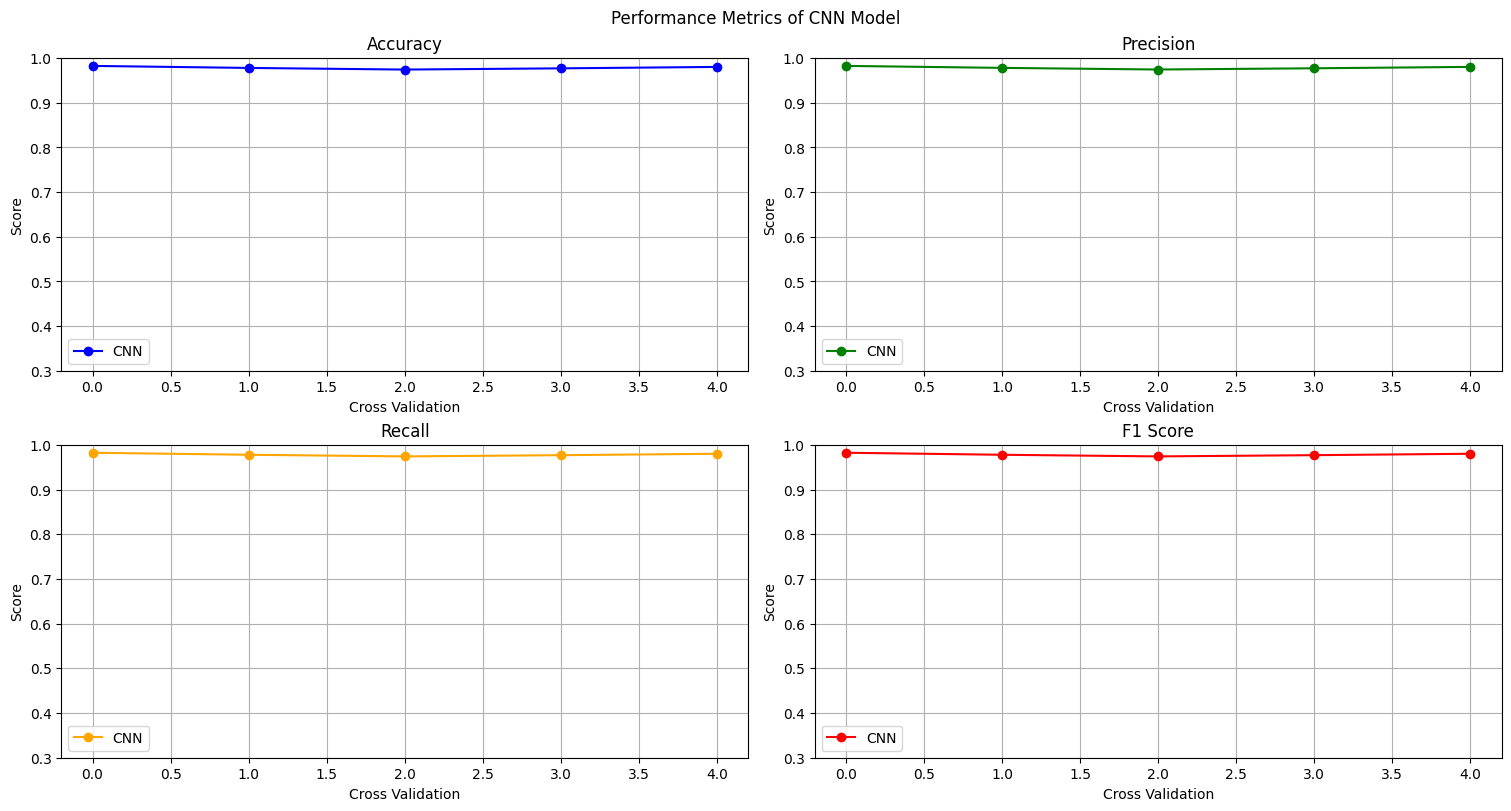

In [ ]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(15, 8))

axs[0, 0].plot(VALIDATION_ACCURACY, color='blue', marker='o', label="CNN")
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Cross Validation')
axs[0, 0].set_ylabel('Score')
axs[0, 0].set_ylim((0.3, 1))
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(VALIDATION_PRECISION, color='green', marker='o', label="CNN")
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Cross Validation')
axs[0, 1].set_ylabel('Score')
axs[0, 1].set_ylim((0.3, 1))
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].plot(VALIDATION_RECALL, color='orange', marker='o', label="CNN")
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Cross Validation')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_ylim((0.3, 1))
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(VALIDATION_F1SCORE, color='red', marker='o', label="CNN")
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Cross Validation')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_ylim((0.3, 1))
axs[1, 1].grid()
axs[1, 1].legend()

# Menambahkan judul utama
plt.suptitle('Performance Metrics of CNN Model')

# Simpan gambar
plt.savefig('/content/drive/MyDrive/Arsitektur_CNN/saved_models/akurasi_cv2.png')

# Menampilkan plot
plt.show()


<ipython-input-17-0ef8da7e706f>:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


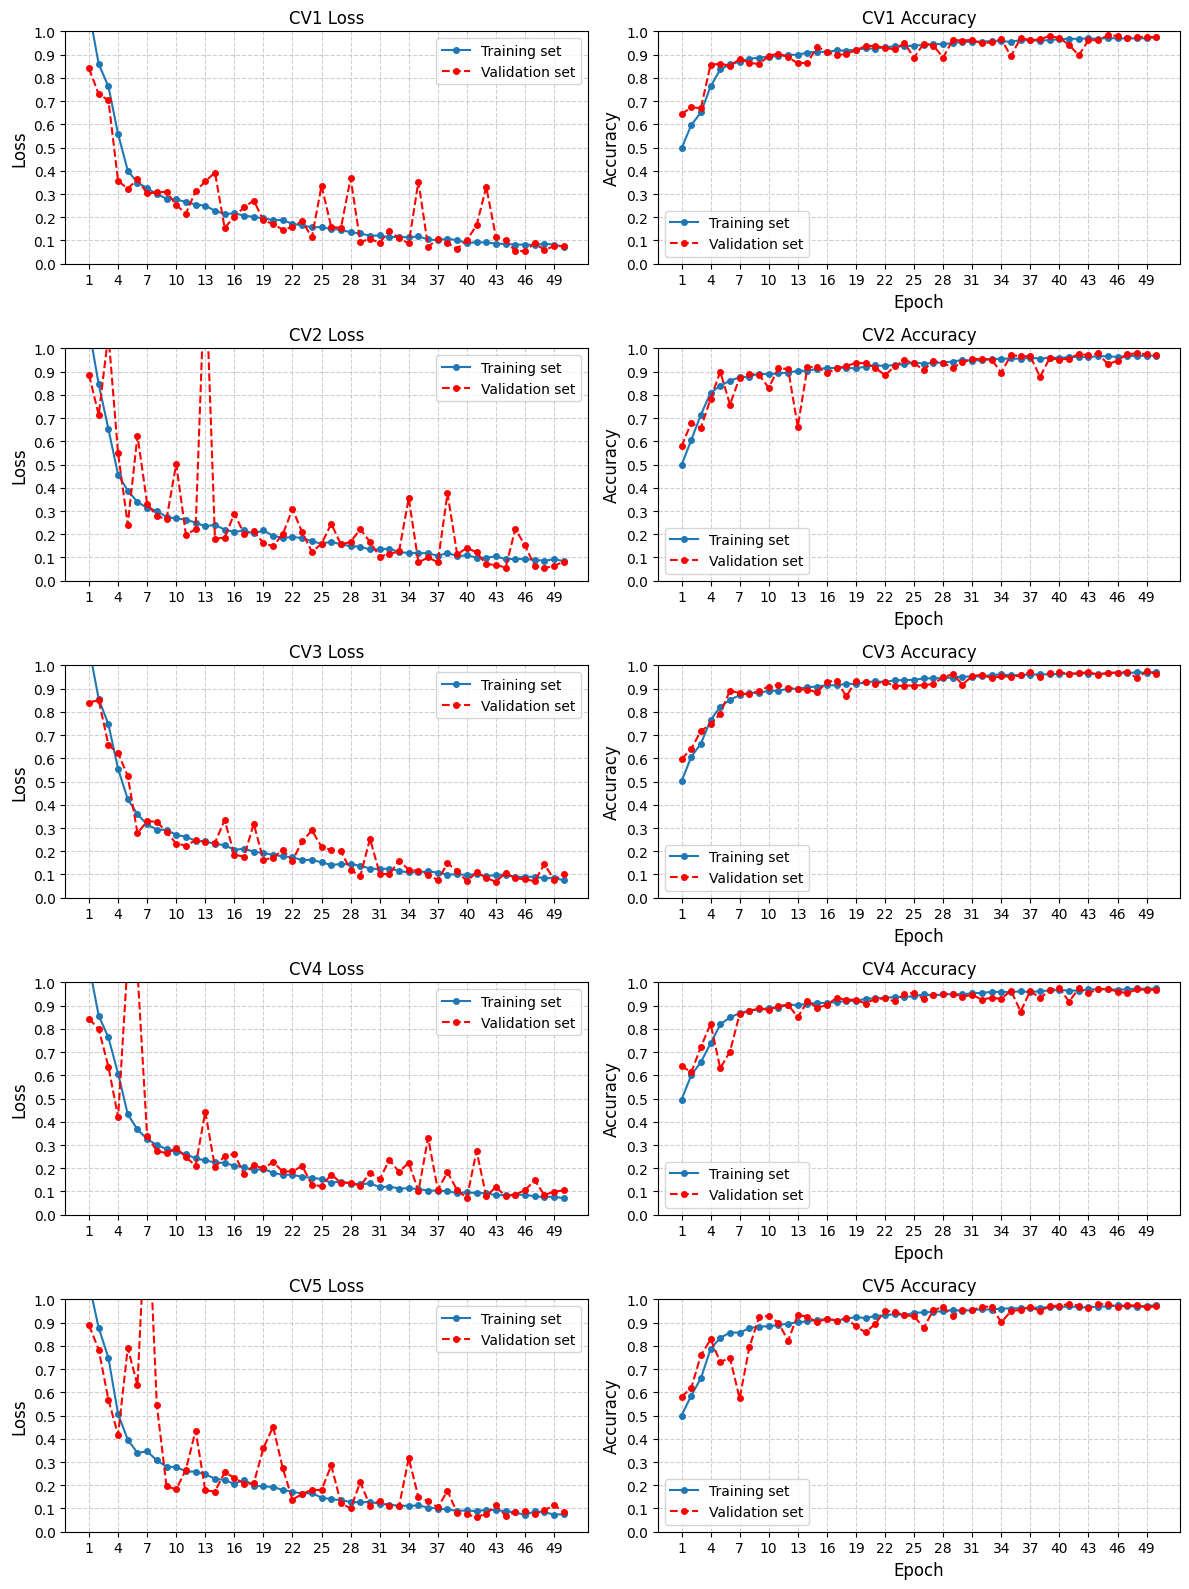

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_epochs = 50

# Set the x axis start from 1
x_axis = np.arange(1, n_epochs + 1, 1)  # jumlah epoch yang kita buat
fig, ax = plt.subplots(5, 2, constrained_layout=True, figsize=(12, 16))  # jumlah grafiknya karena 3 kfold

for i in range(5):  # jumlah kfold
    for j in range(2):
        if j == 0:
            ax[i, j].set_title('CV' + str(i + 1) + ' Loss', fontsize=12)
            ax[i, j].set_ylabel('Loss', fontsize=12)
            ax[i, j].plot(x_axis, LOSS[i], label='Training set', marker='o', markersize=4)
            ax[i, j].plot(x_axis, VAL_LOSS[i], label='Validation set', linestyle='--', marker='o', markersize=4, color='red')
        else:
            ax[i, j].set_title('CV' + str(i + 1) + ' Accuracy', fontsize=12)
            ax[i, j].set_xlabel('Epoch', fontsize=12)
            ax[i, j].set_ylabel('Accuracy', fontsize=12)
            ax[i, j].plot(x_axis, ACCURACY[i], label='Training set', marker='o', markersize=4)
            ax[i, j].plot(x_axis, VAL_ACCURACY[i], label='Validation set', linestyle='--', marker='o', markersize=4, color='red')

        ax[i, j].set_ylim((0, 1))
        ax[i, j].set_xticks(np.arange(1, n_epochs + 1, 3))  # jumlah epoch kita
        ax[i, j].set_yticks(np.linspace(0, 1, 11))  # Selang 0.1 pada sumbu y
        ax[i, j].grid(True, linestyle='--', alpha=0.6)
        ax[i, j].legend(fontsize=10)

plt.tight_layout()

# Simpan Gambar
plt.savefig('/content/drive/MyDrive/Arsitektur_CNN/saved_models/akurasi_plotfix.png')

plt.show()

# **Part 3 - Load the Model Saved Model**

## **Visualization Performance**

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Arsitektur_CNN/saved_models/Hail-3 (LR 0.001 EP 30)/cv_results.csv')
# df = df.drop(df.index[5:])
# df.to_csv('/content/drive/MyDrive/Arsitektur_CNN/saved_models/cv_results.csv', index=False)
# df

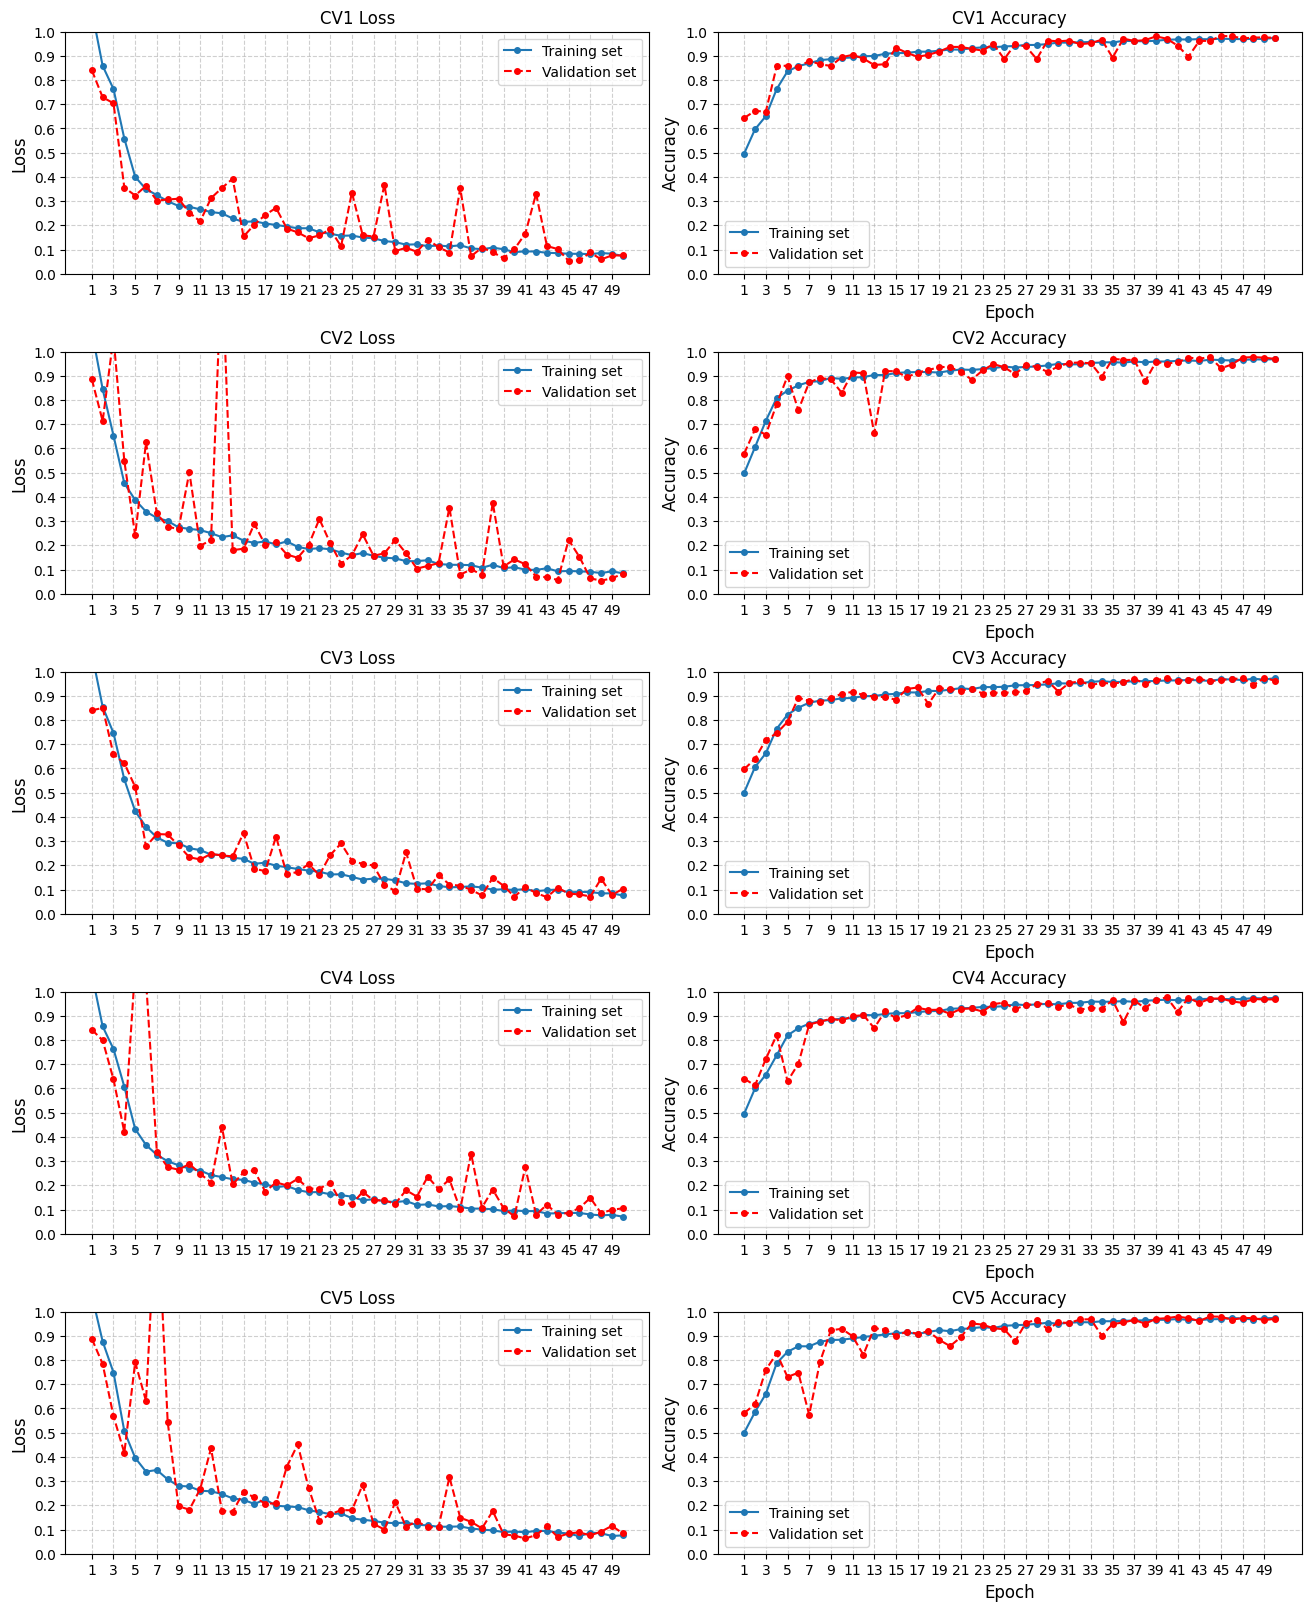

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('/content/drive/MyDrive/Arsitektur_CNN/saved_models/cv_results.csv')

# Konversi string yang berisi list menjadi list Python
df['LOSS'] = df['LOSS'].apply(ast.literal_eval)
df['VAL_LOSS'] = df['VAL_LOSS'].apply(ast.literal_eval)
df['ACCURACY'] = df['ACCURACY'].apply(ast.literal_eval)
df['VAL_ACCURACY'] = df['VAL_ACCURACY'].apply(ast.literal_eval)

# Plotting
n_epochs = len(df['LOSS'].iloc[0])  # Mendapatkan jumlah epoch dari satu CV (dianggap sama untuk semua CV)
x_axis = range(1, n_epochs + 1)
fig, ax = plt.subplots(len(df), 2, constrained_layout=True, figsize=(13, 16))


for i in range(len(df)):
    for j in range(2):
        if j == 0:
          ax[i, j].set_title('CV' + str(i + 1) + ' Loss', fontsize=12)
          ax[i, j].set_ylabel('Loss', fontsize=12)
          ax[i, j].plot(x_axis, df['LOSS'][i], label='Training set', marker='o', markersize=4)
          ax[i, j].plot(x_axis, df['VAL_LOSS'][i], label='Validation set', linestyle='--', marker='o', markersize=4, color='red')
        else:
          ax[i, j].set_title('CV' + str(i + 1) + ' Accuracy', fontsize=12)
          ax[i, j].set_xlabel('Epoch', fontsize=12)
          ax[i, j].set_ylabel('Accuracy', fontsize=12)
          ax[i, j].plot(x_axis, df['ACCURACY'][i], label='Training set', marker='o', markersize=4)
          ax[i, j].plot(x_axis, df['VAL_ACCURACY'][i], label='Validation set', linestyle='--', marker='o', markersize=4, color='red')

        ax[i, j].set_ylim((0, 1))
        ax[i, j].set_xticks(np.arange(1, n_epochs + 1, 2))  # jumlah epoch kita
        ax[i, j].set_yticks(np.linspace(0, 1, 11 ))  # Selang 0.1 pada sumbu y
        ax[i, j].grid(True, linestyle='--', alpha=0.6)
        ax[i, j].legend(fontsize=10)

# Simpan Gambar
plt.savefig('/content/drive/MyDrive/Arsitektur_CNN/saved_models/akurasi_plotfix.png')

plt.show()


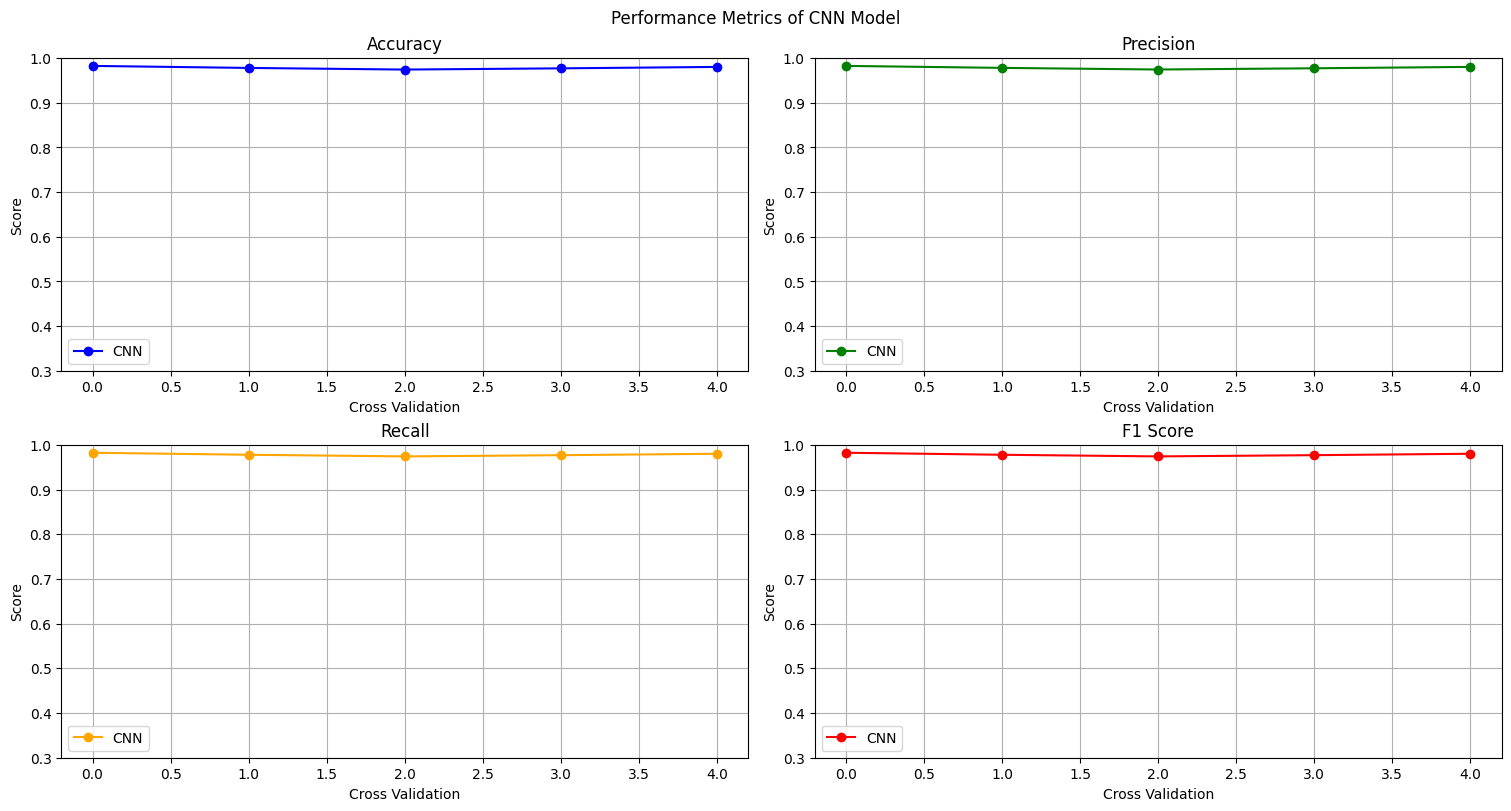

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(15, 8))

axs[0, 0].plot(df['VALIDATION_ACCURACY'], color='blue', marker='o', label="CNN")
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Cross Validation')
axs[0, 0].set_ylabel('Score')
axs[0, 0].set_ylim((0.3, 1))
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(df['VALIDATION_PRECISION'], color='green', marker='o', label="CNN")
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Cross Validation')
axs[0, 1].set_ylabel('Score')
axs[0, 1].set_ylim((0.3, 1))
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].plot(df['VALIDATION_RECALL'], color='orange', marker='o', label="CNN")
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Cross Validation')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_ylim((0.3, 1))
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(df['VALIDATION_F1SCORE'], color='red', marker='o', label="CNN")
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Cross Validation')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_ylim((0.3, 1))
axs[1, 1].grid()
axs[1, 1].legend()

# Menambahkan judul utama
plt.suptitle('Performance Metrics of CNN Model')

# Simpan gambar
plt.savefig('/content/drive/MyDrive/Arsitektur_CNN/saved_models/akurasi_cv2.png')

# Menampilkan plot
plt.show()


## **Evaluation Model**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Load model dari file .h5
model_path = '/content/drive/MyDrive/Arsitektur_CNN/saved_models/model_1.h5'
model = load_model(model_path)

# Path ke folder dataset uji
test_data_dir = '/content/drive/MyDrive/Arsitektur_CNN/dataset/data-train'

# Inisialisasi ImageDataGenerator untuk memuat dan mengubah data gambar
test_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan flow_from_directory untuk memuat data gambar dari folder
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),  # Sesuaikan dengan ukuran input model Anda
    batch_size=8,
    class_mode='categorical',  # Jika menggunakan kelas kategorikal
    shuffle=False  # Penting untuk mempertahankan urutan gambar untuk evaluasi
)

# Prediksi kelas untuk data uji
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1) # Ambil kelas dengan probabilitas tertinggi

# Ambil label yang sebenarnya dari data uji
y_true = test_generator.classes
# Hitung confusion matrix

cm = confusion_matrix(y_true, y_pred)
# Tampilkan hasil prediksi
print(y_pred)



In [ ]:
# model_path = '/content/drive/MyDrive/Arsitektur_CNN/saved_models/model_4.h5'
# model = load_model(model_path)
# model.summary()

Confusion Matrix:
[[3601   27   46]
 [  18 3654    2]
 [  60    5 3609]]

Classification Report:
                           precision    recall  f1-score   support

      mengantuk & menguap       0.98      0.98      0.98      3674
mengantuk & tidak menguap       0.99      0.99      0.99      3674
tidak mengantuk & menguap       0.99      0.98      0.98      3674

                 accuracy                           0.99     11022
                macro avg       0.99      0.99      0.99     11022
             weighted avg       0.99      0.99      0.99     11022



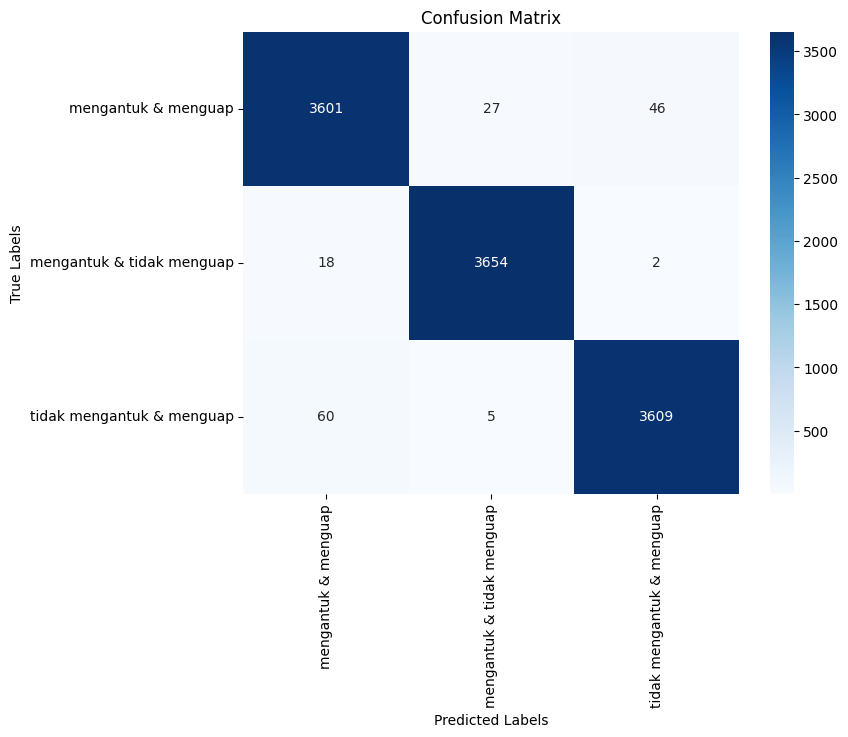

In [ ]:
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(cm)

# Tampilkan laporan klasifikasi
class_labels = list(test_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names= class_labels))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
